# $Série$ $n°1:$ $compression$ $par$ $RLE$ $et$ $Huffman$

## <u>Exercice 1</u>: Compression par codage $RLE$

In [1]:
from IPython.display import display
from PIL import Image
import numpy as np
import matplotlib.pyplot as plt

/home/issa-sangare/.local/lib/python3.10/site-packages/matplotlib/projections/__init__.py:63: UserWarning: Unable to import Axes3D. This may be due to multiple versions of Matplotlib being installed (e.g. as a system package and as a pip package). As a result, the 3D projection is not available.
  warnings.warn("Unable to import Axes3D. This may be due to multiple versions of "


In [2]:
path1 = '../../../Media Files/Images/imgs1/img1_rgb.png'
path2 = 'rle_rgb.png'

In [3]:
img = Image.open(path1)
print(img.mode)
img = np.array(img)

RGB


### (1). Retourne la suite des tuples, $(symbol$ $et$ $occur)$ d’une suite de symboles passée en argument ; où $symbol$, $occur$ font référence respectivement à un nouveau symbole trouvé dans la source et sa fréquence d’occurrence.

In [4]:
def sym_occ(data):
    if isinstance(data, list):
        data += [str(i) for i in data]
    encoded_data = []
    
    for char in data:
        if not encoded_data:
            encoded_data.append((char, 1))
        else:
            last = encoded_data[-1]
            if last[0] == char:
                encoded_data[-1] = (last[0], last[1] + 1)
            else:
                encoded_data.append((char, 1))
                
    return encoded_data

### (2). Évalue le code $RLE$ de la suite de symboles initiale.

In [5]:
def encoding_RLE(data):
    encoded_data = sym_occ(data)
    code = []
    
    if encoded_data[0][0] == '1':  # Check if code is not empty before accessing its elements
        code.append('0')
        
    for _, (_, j) in enumerate(encoded_data):
        courant = str(j)
        code.append(courant)
        
    return code

### (3). Calcule le taux de compression.

In [6]:
def compression_ratio(data, compressed_data):
    occurences = []
    
    for i in compressed_data:
        occurences.append(int(i))
        
    maxi = max(occurences)
    bit_max = int(np.log2(maxi)) + 1
    taux = 1 - ((len(compressed_data) * bit_max) / len(data))
    return taux

### (4). Implémente l’algorithme de décodage $RLE$.

In [7]:
def decoding_RLE(code):
    # Vérifier si la séquence de codage commence par '0' ou '1'
    if code[0] == '0':
        start_with_zero = True
    else:
        start_with_zero = False
    
    if start_with_zero:
        code = code[1:]
    
    # Initialiser une liste pour stocker les données décodées
    decoded_data = ''
    
    # Initialiser la valeur pour la séquence alternée
    alternate_value = '1' if start_with_zero else '0'
    
    # Itérer sur les éléments de code pour déterminer le nombre de répétitions et reconstruire les données originales
    for i in range(len(code)):
        count = int(code[i])
        decoded_data += alternate_value * count
        alternate_value = '0' if alternate_value == '1' else '1'  # Alterner entre '0' et '1'
    
    return decoded_data

## $Test$ $de$ $compression$ $et$ $de$ $décompression$

In [8]:
def vecteur_ligne(matrice):
  shape = matrice.shape
  vecteur = matrice.flatten()
  return np.array(vecteur), shape

In [9]:
def inverse_vecteur_ligne(vecteur, shape):
  mat = np.array(vecteur).reshape((shape[0], shape[1]))
  return mat

In [10]:
def vecteur_colonne(matrice):
    shape = matrice.shape
    vecteur = np.ravel(matrice, order = 'F')
    return np.array(vecteur), shape

In [11]:
def inverse_vecteur_colonne(vecteur, shape):
    mat = np.array(vecteur).reshape((shape[0], shape[1]))
    return mat.T

In [12]:
def vecteur_zigzag(matrice):
  shape = matrice.shape
  vecteur = np.concatenate([np.diagonal(matrice[::-1,:], i)[::(2*(i % 2)-1)] for i in range(1 - matrice.shape[0], matrice.shape[0])])
  return np.array(vecteur), shape

In [13]:
def inverse_vecteur_zigzag(vector, shape):
    rows, cols = shape
    mat = np.array([[None] * cols for _ in range(rows)])
    row, col = 0, 0
    direction = 1

    for i in range(rows * cols):
        mat[row][col] = vector[i]
        if direction == 1:
            if col == cols - 1:
                row += 1
                direction = -1
            elif row == 0:
                col += 1
                direction = -1
            else:
                row -= 1
                col += 1
        else:
            if row == rows - 1:
                col += 1
                direction = 1
            elif col == 0:
                row += 1
                direction = 1
            else:
                row += 1
                col -= 1

    #return np.array(mat, dtype=np.uint8)
    return mat

In [14]:
def matrices_vecteur_lll(matrices):
  # Assuming matrices is of shape (height, width, 3)
    R = matrices[:, :, 0]  # Extract Red channel
    G = matrices[:, :, 1]  # Extract Green channel
    B = matrices[:, :, 2]  # Extract Blue channel
    
    rouge, shape = vecteur_ligne(R)
    vert, _ = vecteur_ligne(G)
    bleu, _ = vecteur_ligne(B)
    
    # Combine the vectors from each channel
    rgb = np.concatenate((rouge, vert, bleu))
    
    return np.array(rgb), shape

In [15]:
def inverse_matrices_vecteur_lll(decompressed, shape):
    if len(decompressed) % 3 != 0:
        raise ValueError("Decompressed data length is not a multiple of 3")

    # Division de la donnée décompressée en trois canaux de couleur
    R = decompressed[:len(decompressed)//3]
    G = decompressed[len(decompressed)//3:2*len(decompressed)//3]
    B = decompressed[2*len(decompressed)//3:]
    
    # Inversion de chaque canal de couleur
    R_inverse = inverse_vecteur_ligne(R, shape)
    G_inverse = inverse_vecteur_ligne(G, shape)
    B_inverse = inverse_vecteur_ligne(B, shape)

    # Création de la matrice tridimensionnelle
    #matrice_tridim = np.array([R_inverse, G_inverse, B_inverse], dtype=np.uint8)
    matrice_tridim = np.stack((R_inverse, G_inverse, B_inverse), axis=-1)
    return np.array(matrice_tridim)

In [16]:
def matrices_vecteur_llc(matrices):
  # Assuming matrices is of shape (height, width, 3)
    R = matrices[:, :, 0]  # Extract Red channel
    G = matrices[:, :, 1]  # Extract Green channel
    B = matrices[:, :, 2]  # Extract Blue channel
    
    rouge, shape = vecteur_ligne(R)
    vert, _ = vecteur_ligne(G)
    bleu, _ = vecteur_colonne(B)
    
    # Combine the vectors from each channel
    rgb = np.concatenate((rouge, vert, bleu))
    
    return np.array(rgb), shape

In [17]:
def inverse_matrices_vecteur_llc(decompressed, shape):
    if len(decompressed) % 3 != 0:
        raise ValueError("Decompressed data length is not a multiple of 3")

    # Division de la donnée décompressée en trois canaux de couleur
    R = decompressed[:len(decompressed)//3]
    G = decompressed[len(decompressed)//3:2*len(decompressed)//3]
    B = decompressed[2*len(decompressed)//3:]
    
    # Inversion de chaque canal de couleur
    R_inverse = inverse_vecteur_ligne(R, shape)
    G_inverse = inverse_vecteur_ligne(G, shape)
    B_inverse = inverse_vecteur_colonne(B, shape)

    # Création de la matrice tridimensionnelle
    #matrice_tridim = np.array([R_inverse, G_inverse, B_inverse], dtype=np.uint8)
    matrice_tridim = np.stack((R_inverse, G_inverse, B_inverse), axis=-1)
    return np.array(matrice_tridim)

In [18]:
def matrices_vecteur_llz(matrices):
  # Assuming matrices is of shape (height, width, 3)
    R = matrices[:, :, 0]  # Extract Red channel
    G = matrices[:, :, 1]  # Extract Green channel
    B = matrices[:, :, 2]  # Extract Blue channel
    
    rouge, shape = vecteur_ligne(R)
    vert, _ = vecteur_ligne(G)
    bleu, _ = vecteur_zigzag(B)
    
    # Combine the vectors from each channel
    rgb = np.concatenate((rouge, vert, bleu))
    
    return np.array(rgb), shape

In [19]:
def inverse_matrices_vecteur_llz(decompressed, shape):
    if len(decompressed) % 3 != 0:
        raise ValueError("Decompressed data length is not a multiple of 3")

    # Division de la donnée décompressée en trois canaux de couleur
    R = decompressed[:len(decompressed)//3]
    G = decompressed[len(decompressed)//3:2*len(decompressed)//3]
    B = decompressed[2*len(decompressed)//3:]
    
    # Inversion de chaque canal de couleur
    R_inverse = inverse_vecteur_ligne(R, shape)
    G_inverse = inverse_vecteur_ligne(G, shape)
    B_inverse = inverse_vecteur_zigzag(B, shape)

    # Création de la matrice tridimensionnelle
    #matrice_tridim = np.array([R_inverse, G_inverse, B_inverse], dtype=np.uint8)
    matrice_tridim = np.stack((R_inverse, G_inverse, B_inverse), axis=-1)
    return np.array(matrice_tridim)

In [20]:
def matrices_vecteur_lcl(matrices):
  # Assuming matrices is of shape (height, width, 3)
    R = matrices[:, :, 0]  # Extract Red channel
    G = matrices[:, :, 1]  # Extract Green channel
    B = matrices[:, :, 2]  # Extract Blue channel
    
    rouge, shape = vecteur_ligne(R)
    vert, _ = vecteur_colonne(G)
    bleu, _ = vecteur_ligne(B)
    
    # Combine the vectors from each channel
    rgb = np.concatenate((rouge, vert, bleu))
    
    return np.array(rgb), shape

In [21]:
def inverse_matrices_vecteur_lcl(decompressed, shape):
    if len(decompressed) % 3 != 0:
        raise ValueError("Decompressed data length is not a multiple of 3")

    # Division de la donnée décompressée en trois canaux de couleur
    R = decompressed[:len(decompressed)//3]
    G = decompressed[len(decompressed)//3:2*len(decompressed)//3]
    B = decompressed[2*len(decompressed)//3:]
    
    # Inversion de chaque canal de couleur
    R_inverse = inverse_vecteur_ligne(R, shape)
    G_inverse = inverse_vecteur_colonne(G, shape)
    B_inverse = inverse_vecteur_ligne(B, shape)

    # Création de la matrice tridimensionnelle
    #matrice_tridim = np.array([R_inverse, G_inverse, B_inverse], dtype=np.uint8)
    matrice_tridim = np.stack((R_inverse, G_inverse, B_inverse), axis=-1)
    return np.array(matrice_tridim)

In [22]:
def matrices_vecteur_lcc(matrices):
  # Assuming matrices is of shape (height, width, 3)
    R = matrices[:, :, 0]  # Extract Red channel
    G = matrices[:, :, 1]  # Extract Green channel
    B = matrices[:, :, 2]  # Extract Blue channel
    
    rouge, shape = vecteur_ligne(R)
    vert, _ = vecteur_colonne(G)
    bleu, _ = vecteur_colonne(B)
    
    # Combine the vectors from each channel
    rgb = np.concatenate((rouge, vert, bleu))
    
    return np.array(rgb), shape

In [23]:
def inverse_matrices_vecteur_lcc(decompressed, shape):
    if len(decompressed) % 3 != 0:
        raise ValueError("Decompressed data length is not a multiple of 3")

    # Division de la donnée décompressée en trois canaux de couleur
    R = decompressed[:len(decompressed)//3]
    G = decompressed[len(decompressed)//3:2*len(decompressed)//3]
    B = decompressed[2*len(decompressed)//3:]
    
    # Inversion de chaque canal de couleur
    R_inverse = inverse_vecteur_ligne(R, shape)
    G_inverse = inverse_vecteur_colonne(G, shape)
    B_inverse = inverse_vecteur_colonne(B, shape)

    # Création de la matrice tridimensionnelle
    #matrice_tridim = np.array([R_inverse, G_inverse, B_inverse], dtype=np.uint8)
    matrice_tridim = np.stack((R_inverse, G_inverse, B_inverse), axis=-1)
    return np.array(matrice_tridim)

In [24]:
def matrices_vecteur_lcz(matrices):
  # Assuming matrices is of shape (height, width, 3)
    R = matrices[:, :, 0]  # Extract Red channel
    G = matrices[:, :, 1]  # Extract Green channel
    B = matrices[:, :, 2]  # Extract Blue channel
    
    rouge, shape = vecteur_ligne(R)
    vert, _ = vecteur_colonne(G)
    bleu, _ = vecteur_zigzag(B)
    
    # Combine the vectors from each channel
    rgb = np.concatenate((rouge, vert, bleu))
    
    return np.array(rgb), shape

In [25]:
def inverse_matrices_vecteur_lcz(decompressed, shape):
    if len(decompressed) % 3 != 0:
        raise ValueError("Decompressed data length is not a multiple of 3")

    # Division de la donnée décompressée en trois canaux de couleur
    R = decompressed[:len(decompressed)//3]
    G = decompressed[len(decompressed)//3:2*len(decompressed)//3]
    B = decompressed[2*len(decompressed)//3:]
    
    # Inversion de chaque canal de couleur
    R_inverse = inverse_vecteur_ligne(R, shape)
    G_inverse = inverse_vecteur_colonne(G, shape)
    B_inverse = inverse_vecteur_zigzag(B, shape)

    # Création de la matrice tridimensionnelle
    #matrice_tridim = np.array([R_inverse, G_inverse, B_inverse], dtype=np.uint8)
    matrice_tridim = np.stack((R_inverse, G_inverse, B_inverse), axis=-1)
    return np.array(matrice_tridim)

In [26]:
def matrices_vecteur_lzl(matrices):
  # Assuming matrices is of shape (height, width, 3)
    R = matrices[:, :, 0]  # Extract Red channel
    G = matrices[:, :, 1]  # Extract Green channel
    B = matrices[:, :, 2]  # Extract Blue channel
    
    rouge, shape = vecteur_ligne(R)
    vert, _ = vecteur_zigzag(G)
    bleu, _ = vecteur_ligne(B)
    
    # Combine the vectors from each channel
    rgb = np.concatenate((rouge, vert, bleu))
    
    return np.array(rgb), shape

In [27]:
def inverse_matrices_vecteur_lzl(decompressed, shape):
    if len(decompressed) % 3 != 0:
        raise ValueError("Decompressed data length is not a multiple of 3")

    # Division de la donnée décompressée en trois canaux de couleur
    R = decompressed[:len(decompressed)//3]
    G = decompressed[len(decompressed)//3:2*len(decompressed)//3]
    B = decompressed[2*len(decompressed)//3:]
    
    # Inversion de chaque canal de couleur
    R_inverse = inverse_vecteur_ligne(R, shape)
    G_inverse = inverse_vecteur_zigzag(G, shape)
    B_inverse = inverse_vecteur_ligne(B, shape)

    # Création de la matrice tridimensionnelle
    #matrice_tridim = np.array([R_inverse, G_inverse, B_inverse], dtype=np.uint8)
    matrice_tridim = np.stack((R_inverse, G_inverse, B_inverse), axis=-1)
    return np.array(matrice_tridim)

In [28]:
def matrices_vecteur_lzc(matrices):
  # Assuming matrices is of shape (height, width, 3)
    R = matrices[:, :, 0]  # Extract Red channel
    G = matrices[:, :, 1]  # Extract Green channel
    B = matrices[:, :, 2]  # Extract Blue channel
    
    rouge, shape = vecteur_ligne(R)
    vert, _ = vecteur_zigzag(G)
    bleu, _ = vecteur_colonne(B)
    
    # Combine the vectors from each channel
    rgb = np.concatenate((rouge, vert, bleu))
    
    return np.array(rgb), shape

In [29]:
def inverse_matrices_vecteur_lzc(decompressed, shape):
    if len(decompressed) % 3 != 0:
        raise ValueError("Decompressed data length is not a multiple of 3")

    # Division de la donnée décompressée en trois canaux de couleur
    R = decompressed[:len(decompressed)//3]
    G = decompressed[len(decompressed)//3:2*len(decompressed)//3]
    B = decompressed[2*len(decompressed)//3:]
    
    # Inversion de chaque canal de couleur
    R_inverse = inverse_vecteur_ligne(R, shape)
    G_inverse = inverse_vecteur_zigzag(G, shape)
    B_inverse = inverse_vecteur_colonne(B, shape)

    # Création de la matrice tridimensionnelle
    #matrice_tridim = np.array([R_inverse, G_inverse, B_inverse], dtype=np.uint8)
    matrice_tridim = np.stack((R_inverse, G_inverse, B_inverse), axis=-1)
    return np.array(matrice_tridim)

In [30]:
def matrices_vecteur_lzz(matrices):
  # Assuming matrices is of shape (height, width, 3)
    R = matrices[:, :, 0]  # Extract Red channel
    G = matrices[:, :, 1]  # Extract Green channel
    B = matrices[:, :, 2]  # Extract Blue channel
    
    rouge, shape = vecteur_ligne(R)
    vert, _ = vecteur_zigzag(G)
    bleu, _ = vecteur_zigzag(B)
    
    # Combine the vectors from each channel
    rgb = np.concatenate((rouge, vert, bleu))
    
    return np.array(rgb), shape

In [31]:
def inverse_matrices_vecteur_lzz(decompressed, shape):
    if len(decompressed) % 3 != 0:
        raise ValueError("Decompressed data length is not a multiple of 3")

    # Division de la donnée décompressée en trois canaux de couleur
    R = decompressed[:len(decompressed)//3]
    G = decompressed[len(decompressed)//3:2*len(decompressed)//3]
    B = decompressed[2*len(decompressed)//3:]
    
    # Inversion de chaque canal de couleur
    R_inverse = inverse_vecteur_ligne(R, shape)
    G_inverse = inverse_vecteur_zigzag(G, shape)
    B_inverse = inverse_vecteur_zigzag(B, shape)

    # Création de la matrice tridimensionnelle
    #matrice_tridim = np.array([R_inverse, G_inverse, B_inverse], dtype=np.uint8)
    matrice_tridim = np.stack((R_inverse, G_inverse, B_inverse), axis=-1)
    return np.array(matrice_tridim)

In [32]:
vect, shape = matrices_vecteur_lll(img)

In [33]:
(img == inverse_matrices_vecteur_lll(vect, shape)).all()

True

In [34]:
def vector_to_ASCII(vecteur):
    return ''.join(chr(caractere) for caractere in vecteur)

In [35]:
def ASCII_to_vector(chaine):
    return np.array([ord(caractere) for caractere in chaine])

In [36]:
text = vector_to_ASCII(vect)

In [37]:
(vect == ASCII_to_vector(text)).all()

True

In [38]:
def text_to_binary(text):
    # Convertir le texte en bytes en utilisant l'encodage Python par défaut (UTF-8)
    encoded_text = text.encode()
    
    # Convertir chaque byte en sa représentation binaire
    binary_sequence = ''.join(format(byte, '08b') for byte in encoded_text)
    
    return binary_sequence

In [39]:
def binary_to_text(binary_sequence):
    # Diviser la séquence binaire en octets de 8 bits
    bytes_list = [binary_sequence[i:i+8] for i in range(0, len(binary_sequence), 8)]
    
    # Convertir chaque octet en caractère en utilisant l'encodage UTF-8
    decoded_text = bytes(int(byte, 2) for byte in bytes_list).decode('utf-8').rstrip('\x00')
    
    return decoded_text

In [40]:
binary = text_to_binary(text)

In [41]:
text == binary_to_text(binary)

True

In [42]:
def rgb_encoding_RLE(path):
  img = Image.open(path)
  img = np.array(img)
  img, shape = matrices_vecteur_lll(img)
  img = vector_to_ASCII(img)
  img = text_to_binary(img)
  img = encoding_RLE(img)
  return img, shape

In [43]:
def rgb_decoding_RLE(encoded, shape, path):
  img = decoding_RLE(encoded)
  print(img[0:100])
  img = binary_to_text(img)
  img = ASCII_to_vector(img)
  img = inverse_matrices_vecteur_lll(img, shape)
  img = Image.fromarray(img.astype(np.uint8))
  img.save(path)

In [44]:
rle_code, shape = rgb_encoding_RLE(path1)

In [45]:
print(rle_code[0:100])

['0', '2', '4', '3', '2', '3', '2', '2', '4', '3', '2', '3', '2', '2', '4', '3', '2', '2', '1', '4', '4', '3', '2', '2', '1', '4', '4', '3', '2', '3', '2', '2', '4', '3', '2', '3', '2', '2', '4', '3', '2', '2', '1', '1', '1', '2', '4', '3', '2', '2', '2', '3', '4', '3', '2', '2', '1', '1', '1', '2', '4', '3', '2', '2', '2', '3', '4', '3', '2', '2', '2', '3', '4', '3', '2', '2', '2', '3', '4', '3', '2', '2', '2', '3', '4', '3', '2', '2', '2', '3', '4', '3', '2', '2', '2', '3', '4', '3', '2', '2']


In [46]:
print(binary[0:100])

1100001110011100110000111001110011000011100110111100001110011011110000111001110011000011100111001100


In [47]:
rgb_decoding_RLE(rle_code, shape, path2)

1100001110011100110000111001110011000011100110111100001110011011110000111001110011000011100111001100


In [48]:
print(f"Taux de compression: {compression_ratio(binary,  rle_code) * 100} %")

Taux de compression: -158.14651892747312 %


In [49]:
def MSE(path_image_d_origine, path_image_traitee):
    image_d_origine = Image.open(path_image_d_origine)
    image_traitee = Image.open(path_image_traitee)
    
    L, C = image_d_origine.size
    # Convertir les images en tableaux NumPy
    origine = np.array(image_d_origine)
    traitee = np.array(image_traitee)

    # Dimensions de la matrice
    #L, C = origine.shape

    # Calcul de la somme de la différence au carré
    somme_differences_carrees = np.sum((origine - traitee) ** 2)

    # Calcul de (1 / (L * C)) * somme
    resultat = (1 / (L * C)) * somme_differences_carrees

    return resultat


# Exemple d'utilisation avec deux matrices (image_nv_gris et image_amelioree)
erreur = MSE(path1, path2)
print(f"L'erreur quadratique moyenne (MSE) est: {erreur}")

L'erreur quadratique moyenne (MSE) est: 0.0


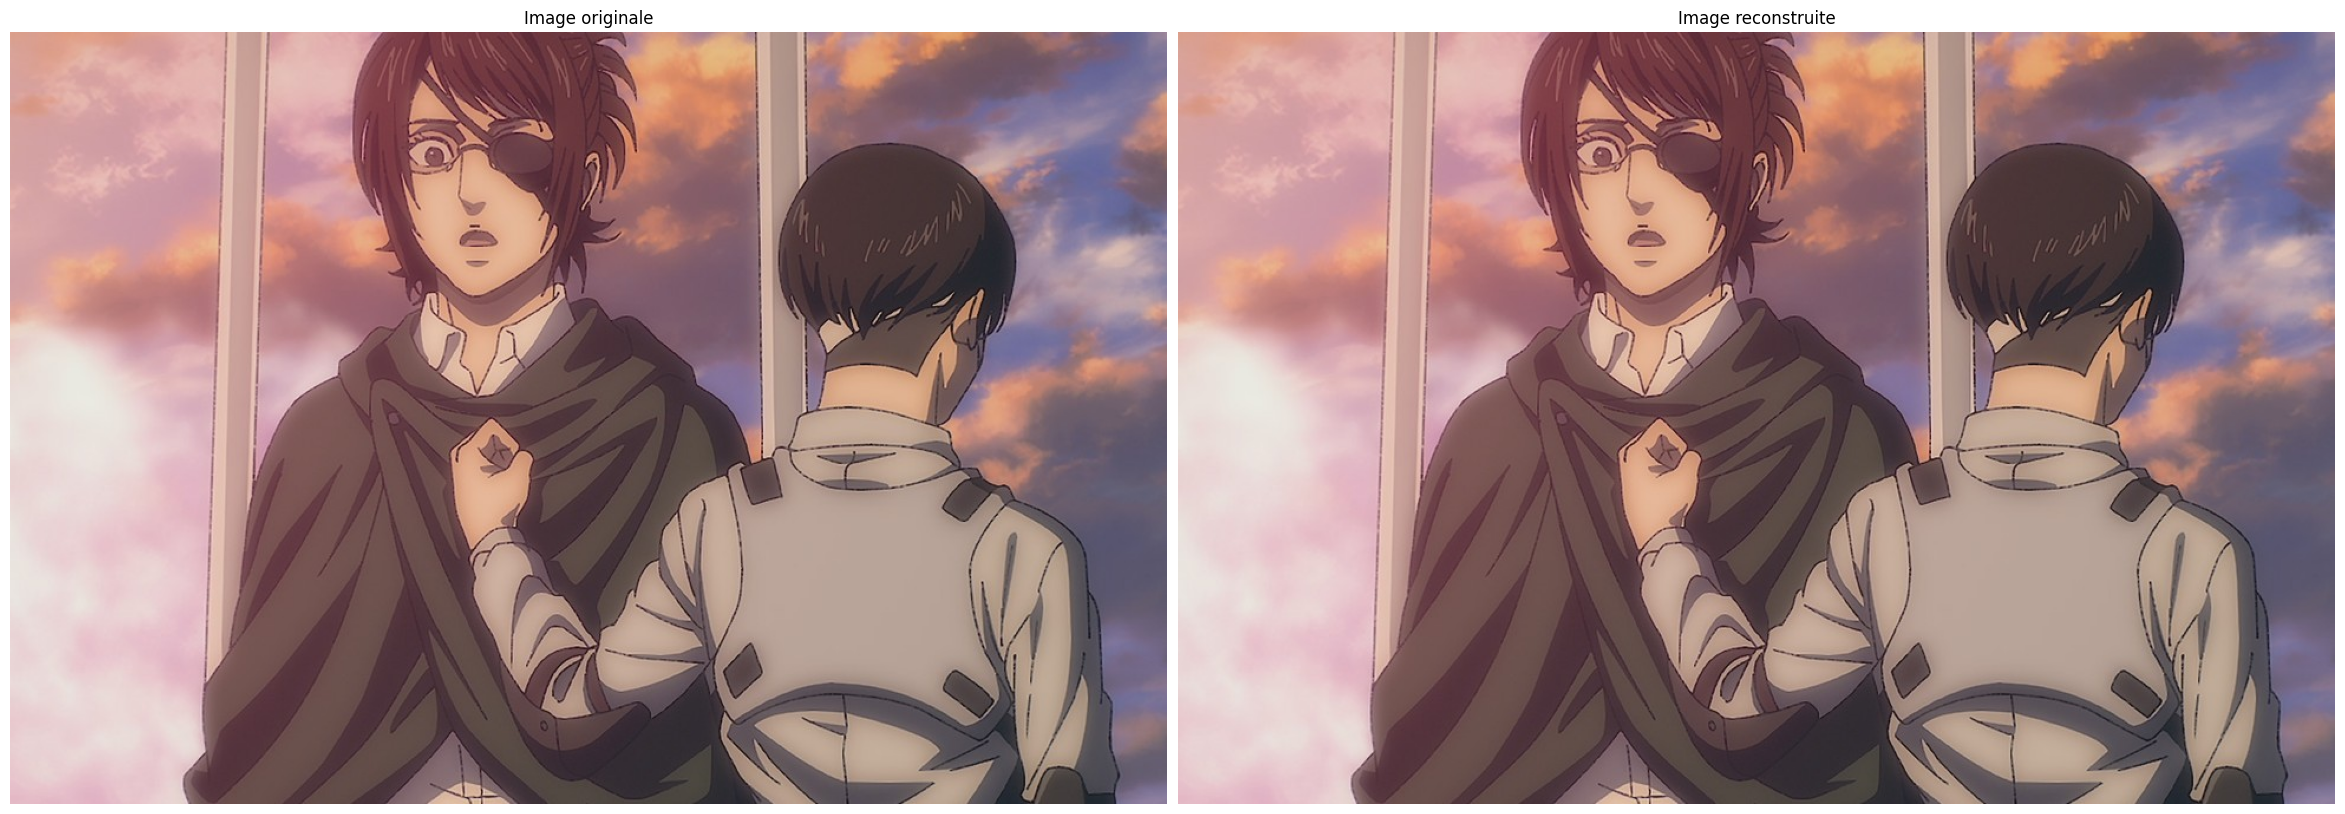

In [51]:
def afficher_images_cote_a_cote(image1_path, image2_path):
    # Charger les images
    image1 = Image.open(image1_path)
    image2 = Image.open(image2_path)
    
    if image1.size[1] > image1.size[0]:
        # Créer une figure avec deux sous-plots
        _, axes = plt.subplots(1, 2, figsize=(20, 15))
    else:
        # Créer une figure avec deux sous-plots
        _, axes = plt.subplots(1, 2, figsize=(30, 15))
    
    # Afficher les images dans les sous-plots
    axes[0].imshow(image1)
    axes[0].set_title('Image originale')
    axes[0].axis('off')  # Désactiver les axes
    axes[1].imshow(image2)
    axes[1].set_title('Image reconstruite')
    axes[1].axis('off')  # Désactiver les axes
    
    # Ajuster les paramètres de la figure pour supprimer l'espace entre les sous-plots
    plt.subplots_adjust(wspace=0.01, hspace=0)
    
    # Afficher la figure
    plt.show()

# Utilisation de la fonction avec les chemins des images en entrée
afficher_images_cote_a_cote(path1, path2)